In [55]:
#Limit output size of HTML display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


# Generate a Fibonacci Squence

Each number in this sequence is the sum of the two numbers that precede it. The sequence starts with 1, 1, 2, 3, 5, 8, and so on. The mathematical equation describing it is Xn+2= Xn+1 + Xn.

In [56]:
'''Uncomment, if input by user should be requested:

#Enter a number to define how many elements of the Fibonacci Sequence should be generated.  Check if entry is an integer.

while True:
    try:
        n=int(input("How many Fibonacci numbers should be generated?  Pick a number:"))
        break
    except ValueError:
        print("Please provide an integer.")
'''
    
#Function which creates n elements of the Fibonacci Sequence.  Preset value for n=15.
def Fibonacci(n=15):
    
    #First two elements of sequence
    row=[1,1]
    
    #Create the sequence
    if n==1:
        row=[1]
    elif n==2:
        row=[1,1]
    elif n>2:
        for i in range(n-2):
            row.append(row[-1]+row[-2])
    
    # Return the created sequence
    return row
    

#Call function and return value
fibo_nr=Fibonacci()

#Only show the first 15 elements to save some space screen in case n is a large number
fibo_nr[:15]


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

##  Drawing Fibonacci Squares and spirale using Turtle Graphics

Following Fibonacci Squares and it's spiral are drawn.  

Note: In Jupyter I can only run this code once and on the second run get a Terminator Error.  When I run this code directly from a Python Script it works fine.  I have not figured out what exactly the problem is.

In [41]:
import turtle

#Function for drawing a square of a certain side length
def draw_square(side_length):  
    for i in range(4):
        turtle.forward(side_length)
        turtle.right(90)
        
#Definition of how many Fibonacci squares should be drawn.  Preset value limited to 11. 
nr_squares=len(fibo_nr[:11])

#Enlargement factor and moving the turtle to the correct starting point to start drawing
factor = 3                        
turtle.penup()
turtle.goto(50,50)                 
turtle.pendown()

#Start drawing Fibonacci squares 
for i in range(nr_squares):
    draw_square(factor*fibo_nr[i]) #Draw square
    turtle.penup()                 #Move to new corner as starting point
    turtle.forward(factor*fibo_nr[i])
    turtle.right(90)
    turtle.forward(factor*fibo_nr[i])
    turtle.pendown()
        
#Move turtle back to starting point and set parameters for drawing the quartercircles        
turtle.penup()
turtle.goto(50,50)       #Move to starting point
turtle.setheading(0)     #Face the turtle to the right
turtle.pencolor('red')
turtle.pensize(3)
turtle.pendown()

#Draw quartercircles with Fibonacci numbers as radius
for i in range(nr_squares):
    turtle.circle(-factor*fibo_nr[i],90)  # minus sign to draw clockwise

#Click on the opened window for closure
turtle.exitonclick()

## Golden Ratio

What happens when we take any two successive Fibonacci Numbers and calculate their ratio?  We receive a value that is close to the golden ratio ($\Phi$=1.618...).  For more backround information on the golden ratio check out Wikipedia [[1]](https://en.wikipedia.org/wiki/Golden_ratio).


In [42]:
#Let's create a DataFrame to visualize the golden ratio in a table 
import pandas as pd

#Define here the amount of values in Fibonacci sequence to perform calculation and visualization on 
fibo_nr=Fibonacci(100)

#Take Fibonacci list from above and calculate ratio of successive numbers
A=fibo_nr[:-1]
B=fibo_nr[1:]

quotient=[] #B/A
for i in range(len(B)):
    quotient.append(B[i]/A[i])

#Create DataFrame to visualize Fibonacci sequence with their successive numbers and respective ratio (B/A)
DF=pd.DataFrame({"A":A, "B":B, "B/A":quotient})

DF[:15]

,A,B,B/A
0,1,1,1.000000
1,1,2,2.000000
2,2,3,1.500000
3,3,5,1.666667
4,5,8,1.600000
5,8,13,1.625000
6,13,21,1.615385
7,21,34,1.619048
8,34,55,1.617647
9,55,89,1.618182


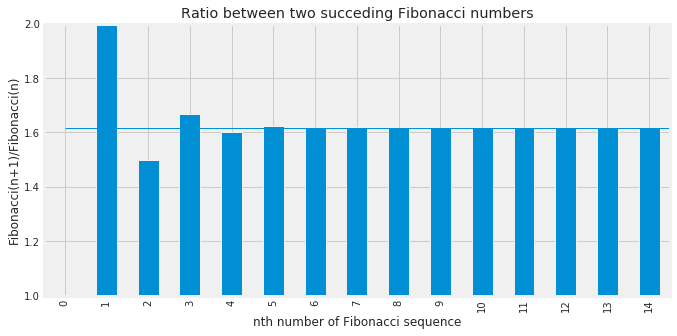

In [43]:
#Visualize PHI over Fibonacci Sequence

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
plt.title("Ratio between two succeding Fibonacci numbers")
plt.ylabel("Fibonacci(n+1)/Fibonacci(n)")
plt.xlabel("nth number of Fibonacci sequence")
plt.ylim([1,2])
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)


#Plot blue line to demonstrate PHI value
plt.plot([0,15],[1.618, 1.618],linewidth=1)

#Plot third column (phi) - only the first 15 columns
DF["B/A"][:15].plot.bar(linewidth=1);

# Fibonacci retracement levels in Finance

Fibonacci retracements are a popular form of technical analysis used by traders in order to predict future potential prices in the financial markets. If used correctly, Fibonacci retracements and ratios can help traders to identify upcoming support and resistance levels based on past price action. [[2]](https://www.cmcmarkets.com/en-gb/trading-guides/how-to-trade-with-fibonacci#:~:text=Fibonacci%20retracements%20are%20a%20popular,based%20on%20past%20price%20action.)

The following Fibonacci ratios play an important role in this analysis.



In [44]:
from termcolor import colored

'''Fibonacci-Retracement-Niveaus
'''
#Create a new Fibonacci sequence
fibo_nr=Fibonacci(100)

#Calculate the golden ratio phi
phi=round(fibo_nr[-1]/fibo_nr[-2],3)
sqrt_phi=phi*(1/2)

r1=round(fibo_nr[-4]/fibo_nr[-1]*100,1)
r2=round(fibo_nr[-3]/fibo_nr[-1]*100,1)
r3=round(fibo_nr[-2]/fibo_nr[-1]*100,1)
r5=round(1/phi*100,1)
r6=round(phi**(1/2)*100,1)

print("Golden Ratio:")
print("\t \u03A6 = {} \n".format(phi))
print("Retracement levels:")
print("\t Level 1 = {}%".format(r1))
print(colored("\t Level 2 = {}%".format(r2), "green"))
print("\t Level 3 = {}%".format(r3))
print("\t Level 4 = 50.0%")
print(colored("\t Level 5 = {}%".format(r5), "green"))
print("\t Level 6 = {}%".format(r6))

Golden Ratio:
	 Φ = 1.618 

Retracement levels:
	 Level 1 = 23.6%
	 Level 2 = 38.2%
	 Level 3 = 61.8%
	 Level 4 = 50.0%
	 Level 5 = 61.8%
	 Level 6 = 127.2%


# Visualization of Fibonacci Retracement levels on stock data



In [45]:
# Setup to import stock data from Yahoo finance

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as dr

# For time stamps
from datetime import datetime

print("Setup Complete")

Setup Complete


In [46]:
#Omiting the time of datetime.now()

from datetime import datetime
datetime.now().date()


datetime.date(2021, 1, 19)

In [47]:
#Set timeframe for stock data to be imported
end = datetime.now().date()
start = datetime(end.year-1, end.month, end.day).date()

df=dr.data.get_data_yahoo("BTC-USD", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-19,9164.362305,8620.080078,8941.445312,8706.245117,3.421732e+10,8706.245117
2020-01-20,8745.590820,8560.473633,8704.631836,8657.642578,2.642238e+10,8657.642578
2020-01-21,8755.706055,8544.520508,8658.991211,8745.894531,2.409742e+10,8745.894531
2020-01-22,8792.994141,8636.747070,8744.210938,8680.875977,2.260020e+10,8680.875977
2020-01-23,8687.747070,8333.637695,8680.650391,8406.515625,2.577068e+10,8406.515625


In [48]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000
mean,12831.449476,12193.757882,12503.093367,12581.359964,3.419545e+10,12581.359964
std,7230.983064,6522.149021,6881.779442,7003.155849,1.469307e+10,7003.155849
min,5331.833984,4106.980957,5002.578125,4970.788086,1.225260e+10,4970.788086
25%,9224.409668,8994.196289,9128.951660,9135.240723,2.345518e+10,9135.240723
50%,10182.340820,9729.334961,9936.162109,9951.518555,3.258974e+10,9951.518555
75%,12687.509277,11927.727051,12121.390137,12539.045898,4.194777e+10,12539.045898
max,41946.738281,38980.875000,40788.640625,40797.609375,1.233206e+11,40797.609375


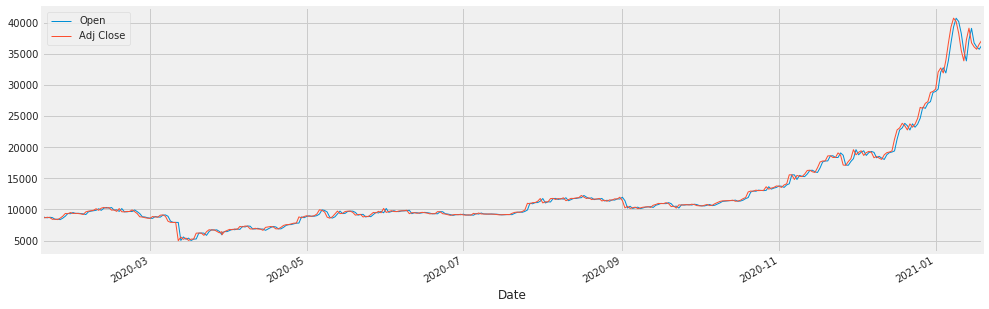

In [49]:
#Show graph of stock data extracted from Yahoo Finance
df[["Open","Adj Close"]].plot(figsize=(15,5), linewidth=1);

In [52]:
#Analysis of closing data 

closing_df=df["Adj Close"]

#Minimum stock price during extracted time frame
date_min=closing_df.idxmin().date()
date_min

value_min=round(closing_df.min())
value_min

#Maximum stock price during extracted time frame
date_max=closing_df.idxmax().date()
date_max

value_max=round(closing_df.max())
value_max

#Calculation of rectracement levels for this graph
dif=value_max-value_min
retr1=value_max-0.236*dif
retr2=value_max-0.382*dif
retr3=value_max-0.500*dif
retr4=value_max-0.618*dif

print("The minimum value {} was reached on {}.".format(value_min, date_min))
print("The maximum value {} was reached on {}.".format(value_max, date_max))


The minimum value 4971.0 was reached on 2020-03-12.
The maximum value 40798.0 was reached on 2021-01-08.


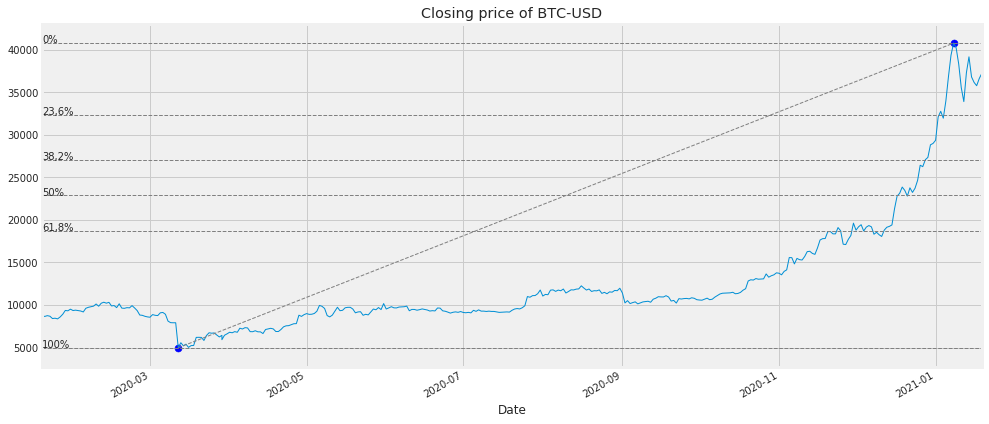

In [53]:
#Plot retracement levels inside stock graph
import matplotlib.pyplot as plt
import seaborn as sns

ax= df[["Adj Close"]].plot(linewidth=1, figsize=(15,7), title=("Closing price of BTC-USD"));
ax.get_legend().remove()

# Rise of the value from the minimum to the maximum value in the selected time frame
plt.plot([date_min, date_max], [value_min, value_max],'--', linewidth=1, color="gray", )
plt.plot([start, end],[value_max, value_max],'--', linewidth=1, color="gray")
plt.plot([start, end],[retr1,retr1],'--', linewidth=1, color="gray")
plt.plot([start, end],[retr2,retr2],'--', linewidth=1, color="gray")
plt.plot([start, end],[retr3,retr3],'--', linewidth=1, color="gray")
plt.plot([start, end],[retr4,retr4],'--', linewidth=1, color="gray")
plt.plot([start, end],[value_min,value_min],'--', linewidth=1, color="gray")

#Y axis put ticks on retracement levels
# plt.yticks([value_max,retr1, retr2, retr3, retr4, value_min]);

#Set marker on max and min value
plt.scatter([date_max], [value_max], s=50, marker='o', color ='blue')
plt.scatter([date_min], [value_min], s=50, marker='o', color ='blue')

#Description of retracement levels.  Add text manually
plt.annotate(r'0%',xy=(start, value_max));
plt.annotate(r'23,6%',xy=(start, retr1));
plt.annotate(r'38,2%',xy=(start, retr2));
plt.annotate(r"50%", xy=(start, retr3));
plt.annotate(r"61,8%", xy=(start, retr4));
plt.annotate(r"100%", xy=(start, value_min));

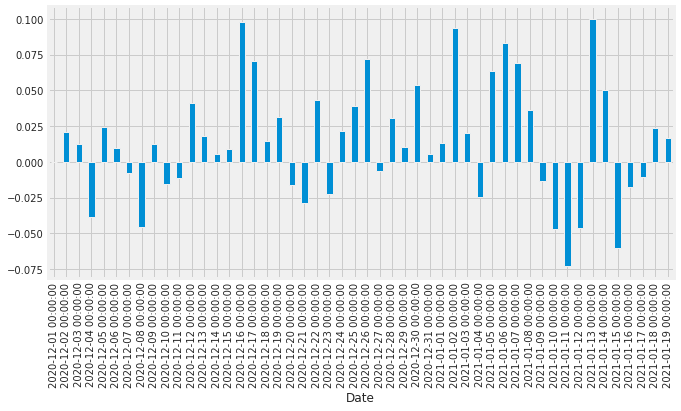

In [54]:
#Percentage change in relation to the day for a defined timeframe

end2 = datetime.now().date()
start2 = "2020-12-01"

#closing_df.loc[start2:end2].head()
closing_df.loc[start2:end2].pct_change().plot.bar(figsize=(10,5), linewidth=1);